## Make Spectrum Figure for Proposal

Based on a couple different datasets but builds a figure comparing satellite and UAS spectral coverage with water constituent absorption properties

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import os.path as op
from matplotlib import colors, ticker
import matplotlib.pyplot as plt
import nc_time_axis
%matplotlib inline

In [2]:
url = 'https://oceandata.sci.gsfc.nasa.gov/opendap/hyrax/MODISA/L3SMI/2009/041/A20090412009048.L3m_8D_CHL_chlor_a_4km.nc'
ds = xr.open_dataset(url)

In [3]:
toa_ir = xr.open_dataset("ssi_v02r01_yearly_s1610_e2019_c20200226.nc")

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/numpy/core/_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [21]:
bottom_wl = 400
top_wl = 920

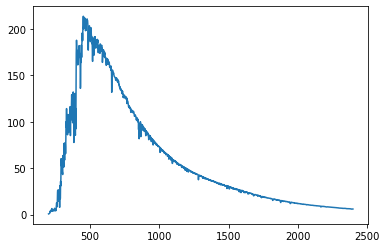

In [5]:
toa_ir = pd.read_csv('toa_irradiance.csv')
plt.plot(toa_ir['wavelength (nm)'], toa_ir['irradiance (uW/cm^2/nm)'])

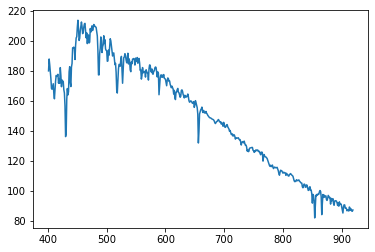

In [6]:
toa_ir_subset = toa_ir[toa_ir['wavelength (nm)'] > bottom_wl]
toa_ir_subset = toa_ir_subset[toa_ir_subset['wavelength (nm)'] < top_wl]
plt.plot(toa_ir_subset['wavelength (nm)'], toa_ir_subset['irradiance (uW/cm^2/nm)'])

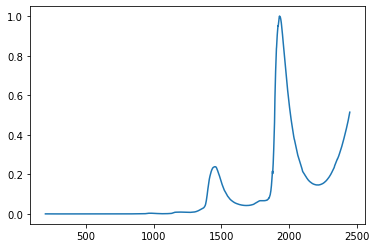

In [7]:
seawater_spec = pd.read_csv('seawater_spectrum.csv')
plt.plot(seawater_spec['wavelength (nm)'], seawater_spec['absorption (m^-1)'] / max(seawater_spec['absorption (m^-1)']))

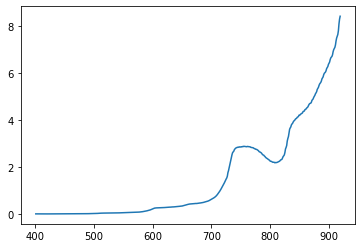

In [8]:
seawater_subset = seawater_spec[seawater_spec['wavelength (nm)'] > bottom_wl]
seawater_subset = seawater_subset[seawater_subset['wavelength (nm)'] < top_wl]
plt.plot(seawater_subset['wavelength (nm)'], seawater_subset['absorption (m^-1)'])

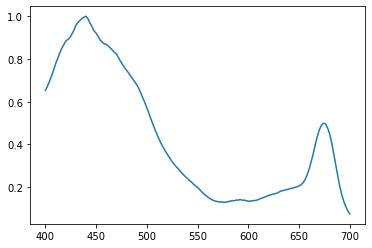

In [9]:
chl_spec = pd.read_csv('chl_spectrum_bricaud.csv')
plt.plot(chl_spec['wavelength (nm)'], chl_spec['chl_abs'] / max(chl_spec['chl_abs']))

(0.0, 1.5)

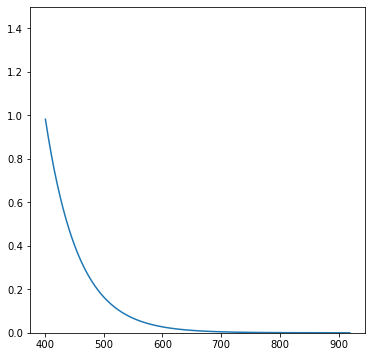

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
x = seawater_subset['wavelength (nm)']
y = np.exp(0.018 * (bottom_wl-seawater_subset['wavelength (nm)']))
ax.plot(x, y)
ax.set_ylim(0,1.5)

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

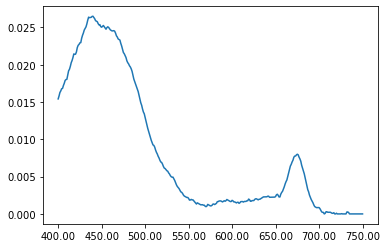

In [11]:
phyto_abs_spectra = pd.read_csv("Optical_data_JR17006_edited.csv")
# data from https://www.bodc.ac.uk/data/published_data_library/catalogue/10.5285/982b6da2-7e12-060a-e053-6c86abc09389/
phyto_abs_spectra.iloc[0].plot()

/home/clifgray/anaconda3/envs/micasense/lib/python3.7/site-packages/ipykernel_launcher.py:111: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later


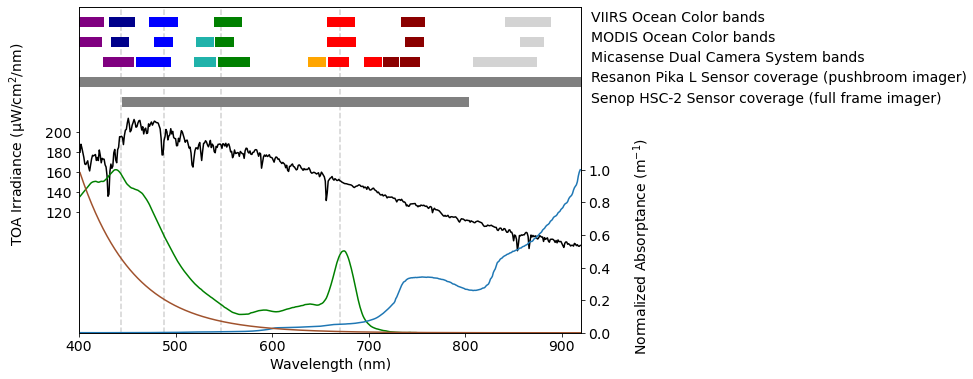

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))

font = {'size'   : 14}
plt.rc('font', **font)


text_offset = 0.004
text_x = 930

viirs_y_position = 310
vbands = [[402,422],[436,454],[478,498],[545,565],[662,682],[739,754],[846,885]]
vcolors = ['purple', 'darkblue', 'blue', 'green', 'red', 'darkred', 'lightgrey']

modis_y_position = 290
mbands = [[405,420],[438,448],[483,493],[526,536],[546,556],[662,672],[673,683],[743,753],[862,877]]
mcolors = ['purple', 'darkblue', 'blue', 'lightseagreen', 'green', 'red', 'red', 'darkred', 'lightgrey']


#Coastal blue 444(28)*, blue 475(32), green 531(14)*, green 560(27), red 650(16)*, red 668(14), red edge 705(10)*, 
# red edge 717(12), red edge 740(18)*, NIR 842(57)
altum_y_position = 270
abands = [[464,491],[549,573],[663,675],[720,727],[813,870]]
acolors = ['blue', 'green', 'red','darkred', 'lightgrey']

coastal_y_position = 250
cbands = [[430,453],[524,538],[642,652],[700,710],[738,749]]
ccolors = ['purple', 'lightseagreen', 'orange','red', 'darkred']

abands = abands + cbands
acolors = acolors + ccolors
# senop_y_position = 230
# sbands = [[450,800]]
# scolors = ['grey']

resanon_y_position = 250
rbands = [[400,1000]]
rcolors = ['grey']

headwall_y_position = 230
hbands = [[400,1000]]
hcolors = ['grey']

ax.axvline(x=443, color='lightgrey', linestyle='--')
ax.axvline(x=488, color='lightgrey', linestyle='--')
ax.axvline(x=547, color='lightgrey', linestyle='--')
ax.axvline(x=670, color='lightgrey', linestyle='--')

#ax.plot(np.nanmean(toa_ir.SSI, axis=0))
#toa_subset = toa_ir.where(toa_ir.wavelength < 900, drop=True).where(toa_ir.wavelength > 400, drop=True).mean('time')
ax.plot(toa_ir_subset['wavelength (nm)'], toa_ir_subset['irradiance (uW/cm^2/nm)'],
        label="TOA Irradiance", color='black')

ax.set_xlabel('Wavelength (nm)', color='black')
ax.set_ylabel('TOA Irradiance (μW/cm$^2$/nm)', color='black')
ax.set_ylim(0, 325)
ax.set_xlim(bottom_wl, top_wl)
ax.set_yticks(np.arange(120, 220, 20))
ax.tick_params(axis='y', labelcolor='black')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 2)
ax2.plot([float(i) for i in phyto_abs_spectra.columns.values], phyto_abs_spectra.mean(axis=0)/max(phyto_abs_spectra.mean(axis=0)),
         label="Phytoplankton Absorptance", color='green')

ax2.plot(seawater_subset['wavelength (nm)'], 
         seawater_subset['absorption (m^-1)'] / max(seawater_subset['absorption (m^-1)']))

cdom_x = seawater_subset['wavelength (nm)']
cdom_y = np.exp(0.018 * (bottom_wl-seawater_subset['wavelength (nm)']))
ax2.plot(cdom_x, cdom_y, color='sienna')

ax.text(text_x,viirs_y_position-text_offset,'VIIRS Ocean Color bands')
ax.text(text_x,modis_y_position-text_offset,'MODIS Ocean Color bands')
ax.text(text_x,altum_y_position-text_offset,'Micasense Dual Camera System bands')
#ax.text(text_x,coastal_y_position-text_offset,'    Micasense Coastal Sensor bands')
ax.text(text_x,senop_y_position-text_offset,'Senop HSC-2 Sensor coverage (full frame imager)')
ax.text(text_x,resanon_y_position-text_offset,'Resanon Pika L Sensor coverage (pushbroom imager)')
#ax.text(text_x,headwall_y_position-text_offset,'Headwall Sensor coverage')

for idx, band in enumerate(vbands):
  ax.plot(np.arange(band[0],band[1]), [viirs_y_position]*(band[1]-band[0]), linewidth=10, c=vcolors[idx])

for idx, band in enumerate(mbands):
  ax.plot(np.arange(band[0],band[1]), [modis_y_position]*(band[1]-band[0]), linewidth=10, c=mcolors[idx])

for idx, band in enumerate(abands):
  ax.plot(np.arange(band[0],band[1]), [altum_y_position]*(band[1]-band[0]), linewidth=10, c=acolors[idx])

# for idx, band in enumerate(cbands):
#    ax.plot(np.arange(band[0],band[1]), [coastal_y_position]*(band[1]-band[0]), linewidth=10, c=ccolors[idx])

for idx, band in enumerate(sbands):
  ax.plot(np.arange(band[0],band[1]), [senop_y_position]*(band[1]-band[0]), linewidth=10, c=scolors[idx])

for idx, band in enumerate(rbands):
   ax.plot(np.arange(band[0],band[1]), [resanon_y_position]*(band[1]-band[0]), linewidth=10, c=rcolors[idx])

# for idx, band in enumerate(hbands):
#    ax.plot(np.arange(band[0],band[1]), [headwall_y_position]*(band[1]-band[0]), linewidth=10, c=hcolors[idx])

#ax.legend(loc="lower left")
#ax2.legend(loc="lower right")
ax2.set_ylabel('Normalized Absorptance (m$^{-1}$)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_yticks(np.arange(0, 1.2, .2))
ax2.yaxis.set_label_coords(1.10,0.265)
ax.yaxis.set_label_coords(-0.10,0.578)

plt.savefig('ocean_spectra', dpi=600, facecolor='w', edgecolor='w',
       orientation='portrait', papertype=None, format=None,
      transparent=True, bbox_inches='tight')
